In [2]:
import heapq
import matplotlib.pyplot as plt

# Função para visualizar o labirinto com o caminho final
def visualizar_labirinto(labirinto, caminho=None):
    plt.figure(figsize=(8, 8))
    filas, colunas = len(labirinto), len(labirinto[0])
    
    for fila in range(filas):
        for coluna in range(colunas):
            if labirinto[fila][coluna] == 1:
                plt.fill([coluna, coluna+1, coluna+1, coluna], [fila, fila, fila+1, fila+1], 'black')
            else:
                plt.fill([coluna, coluna+1, colunas, coluna], [fila, fila, fila+1, fila+1], 'white')

    if caminho:
        for (x, y) in caminho:
            plt.fill([y, y+1, y+1, y], [x, x, x+1, x+1], 'red')

    plt.gca().invert_yaxis()
    plt.show()

# Função para editar o mapa interativamente no terminal
def editar_mapa(labirinto):
    while True:
        print("Mapa Atual:")
        for linha in labirinto:
            print(linha)

        opcao = input("Digite 'a' para adicionar uma parede, 'r' para remover uma parede, ou 's' para sair: ").lower()

        if opcao == 's':
            break
        elif opcao in ['a', 'r']:
            x = int(input("Digite a linha (1 a 10): ")) - 1
            y = int(input("Digite a coluna (1 a 10): ")) - 1

            if opcao == 'a':
                labirinto[x][y] = 1
            elif opcao == 'r':
                labirinto[x][y] = 0
        else:
            print("Opção inválida!")
    
    return labirinto

# Função para obter os vizinhos válidos de um nó
def obter_vizinhos(labirinto, no):
    vizinhos = []  # 1 unidade de tempo (inicialização de lista)
    direcoes = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # 1 unidade de tempo (inicialização de lista com 4 direções)
    
    # O loop 'for' executa 4 vezes (n = 4, já que temos 4 direções)
    for d in direcoes:  # 4 unidades (uma por iteração, já que o número de direções é fixo, n = 4)
        vizinho = (no[0] + d[0], no[1] + d[1])  # 2 unidades por iteração (2 somas) -> Total: 4 * 2 = 8 unidades de tempo
        
        # Condição com 3 comparações: duas comparações em cada eixo (x, y)
        if 0 <= vizinho[0] < len(labirinto) and 0 <= vizinho[1] < len(labirinto[0]):  # 3 unidades por iteração -> Total: 4 * 3 = 12 unidades
        
            # Verifica se a célula é acessível (comparação de valor)
            if labirinto[vizinho[0]][vizinho[1]] == 0:  # 2 unidades por iteração -> Total: 4 * 2 = 8 unidades
                vizinhos.append(vizinho)  # 1 unidade de tempo por iteração (adição à lista) -> Total: até 4 unidades no pior caso
        
    return vizinhos  # 1 unidade de tempo (retorno)


In [3]:
# Função Heurística
def heuristica(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])  # 4 unidades de tempo (subtrações e somas)

# Algoritmo A* com detalhamento da busca
def busca_a_estrela(labirinto, inicio, objetivo):
    filas, colunas = len(labirinto), len(labirinto[0])  # 2 unidades de tempo (chamadas de len)
    
    lista_aberta = []  # 1 unidade de tempo (inicialização de lista)
    heapq.heappush(lista_aberta, (0, inicio))  # 1 unidade de tempo (inserção no heap)
    
    de_onde_veio = {}  # 1 unidade de tempo (inicialização de dicionário)
    custo_g = {inicio: 0}  # 1 unidade de tempo (inicialização de dicionário)
    custo_f = {inicio: heuristica(inicio, objetivo)}  # 2 unidades de tempo (chamada de heurística + atribuição)
    
    nos_visitados = []  # 1 unidade de tempo (inicialização de lista)
    
    print("Início da busca A*")  # 1 unidade de tempo (print)
    
    # O laço 'while' continua até que a lista aberta esteja vazia. No pior caso, ele pode iterar sobre todos os nós no grafo.
    while lista_aberta:  # 1 unidade por iteração (condição)
        atual = heapq.heappop(lista_aberta)[1]  # 2 unidades por iteração (remoção do heap + acesso ao elemento)
        nos_visitados.append(atual)  # 1 unidade por iteração (adição à lista)
        
        print(f"Nó atual: {atual}, Custo G: {custo_g[atual]}, Custo F: {custo_f[atual]}")  # 1 unidade de tempo (print)

        # Verifica se o nó atual é o objetivo (comparação)
        if atual == objetivo:  # 1 unidade de tempo (comparação)
            caminho_final = reconstruir_caminho(de_onde_veio, atual)  # 1 unidade de tempo (chamada de função)
            print(f"Caminho encontrado: {caminho_final}")  # 1 unidade de tempo (print)
            print(f"Nós Visitados: {nos_visitados}")  # 1 unidade de tempo (print)
            return caminho_final  # 1 unidade de tempo (retorno)
        
        # Loop para verificar todos os vizinhos do nó atual
        for vizinho in obter_vizinhos(labirinto, atual):  # Se tiver n_viz vizinhos, itera n_viz vezes -> 1 unidade por vizinho
            custo_g_tentativo = custo_g[atual] + 1  # 2 unidades de tempo por vizinho (soma e atribuição)
            
            if vizinho not in custo_g or custo_g_tentativo < custo_g[vizinho]:  # 2 unidades por vizinho (verificação de chave + comparação)
                de_onde_veio[vizinho] = atual  # 1 unidade por vizinho (atribuição ao dicionário)
                custo_g[vizinho] = custo_g_tentativo  # 1 unidade por vizinho (atribuição ao dicionário)
                custo_f[vizinho] = custo_g_tentativo + heuristica(vizinho, objetivo)  # 2 unidades por vizinho (soma + chamada de heurística)
                heapq.heappush(lista_aberta, (custo_f[vizinho], vizinho))  # 1 unidade por vizinho (inserção no heap)
    
    print("Nenhum caminho encontrado.")  # 1 unidade de tempo (print)
    return None  # 1 unidade de tempo (retorno)

def reconstruir_caminho(de_onde_veio, atual):
    caminho_total = [atual]  # 1 unidade de tempo (criação de lista com um elemento)
    
    # O laço while continua até que o caminho esteja totalmente reconstruído
    # Cada iteração depende do tamanho do caminho, que chamaremos de "n" (o número de nós até o início)
    while atual in de_onde_veio:  # 1 unidade por iteração (verificação de chave no dicionário) -> Total: n unidades de tempo
        atual = de_onde_veio[atual]  # 1 unidade por iteração (atribuição a partir do dicionário) -> Total: n unidades de tempo
        caminho_total.append(atual)  # 1 unidade por iteração (adição à lista) -> Total: n unidades de tempo
    
    return caminho_total[::-1]  # 1 unidade de tempo (inversão da lista) + 1 unidade de tempo (retorno)


In [4]:
def busca_bidirecional(labirinto, inicio, objetivo):
    fila_frente = [(inicio, [inicio])]  # Inclui o ponto inicial no caminho
    fila_tras = [(objetivo, [objetivo])]  # Inclui o ponto objetivo no caminho
    
    visitado_frente = {inicio: [inicio]}  # Marca o ponto inicial como visitado com o caminho atualizado
    visitado_tras = {objetivo: [objetivo]}  # Marca o ponto objetivo como visitado com o caminho atualizado
    
    nos_visitados_frente = []
    nos_visitados_tras = []
    
    print("Início da busca bidirecional")
    
    while fila_frente and fila_tras:
        # Parte da busca pela frente
        if fila_frente:
            atual_frente, caminho_frente = fila_frente.pop(0)
            nos_visitados_frente.append(atual_frente)
            print(f"Nó atual (frente): {atual_frente}, Caminho até aqui: {caminho_frente}")
            
            if atual_frente in visitado_tras:
                caminho_final = caminho_frente + visitado_tras[atual_frente][::-1][1:]  # Remove duplicata do ponto de encontro
                print(f"Caminho encontrado: {caminho_final}")
                print(f"Nós Visitados Frente: {nos_visitados_frente}, Nós Visitados Trás: {nos_visitados_tras}")
                return caminho_final
            
            for vizinho in obter_vizinhos(labirinto, atual_frente):
                if vizinho not in visitado_frente:
                    visitado_frente[vizinho] = caminho_frente + [vizinho]
                    fila_frente.append((vizinho, caminho_frente + [vizinho]))
        
        # Parte da busca por trás
        if fila_tras:
            atual_tras, caminho_tras = fila_tras.pop(0)
            nos_visitados_tras.append(atual_tras)
            print(f"Nó atual (trás): {atual_tras}, Caminho até aqui: {caminho_tras}")
            
            if atual_tras in visitado_frente:
                caminho_final = visitado_frente[atual_tras] + caminho_tras[::-1][1:]  # Remove duplicata do ponto de encontro
                print(f"Caminho encontrado: {caminho_final}")
                print(f"Nós Visitados Frente: {nos_visitados_frente}, Nós Visitados Trás: {nos_visitados_tras}")
                return caminho_final
            
            for vizinho in obter_vizinhos(labirinto, atual_tras):
                if vizinho not in visitado_tras:
                    visitado_tras[vizinho] = caminho_tras + [vizinho]
                    fila_tras.append((vizinho, caminho_tras + [vizinho]))
    
    print("Nenhum caminho encontrado.")
    return None


Mapa Atual:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1]
[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Início da busca A*
Nó atual: (1, 1, 1), Custo G: 0, Custo F: 16
Nó atual: (1, 2), Custo G: 1, Custo F: 16
Nó atual: (1, 3), Custo G: 2, Custo F: 16
Nó atual: (1, 4), Custo G: 3, Custo F: 16
Nó atual: (1, 5), Custo G: 4, Custo F: 16
Nó atual: (1, 6), Custo G: 5, Custo F: 16
Nó atual: (1, 7), Custo G: 6, Custo F: 16
Nó atual: (1, 8), Custo G: 7, Custo F: 16
Nó atual: (1, 9), Custo G: 8, Custo F: 16
Nó atual: (2, 2), Custo G: 2, Custo F: 16
Nó atual: (2, 4), Custo G: 4, Custo F: 16
Nó atual: (2, 8), Custo G: 8, Custo F: 16
Nó atual: (3, 2), Custo G: 3, Custo F: 16
Nó atual: (3, 4), Custo G: 5, Custo F: 16
Nó a

ValueError: too many values to unpack (expected 2)

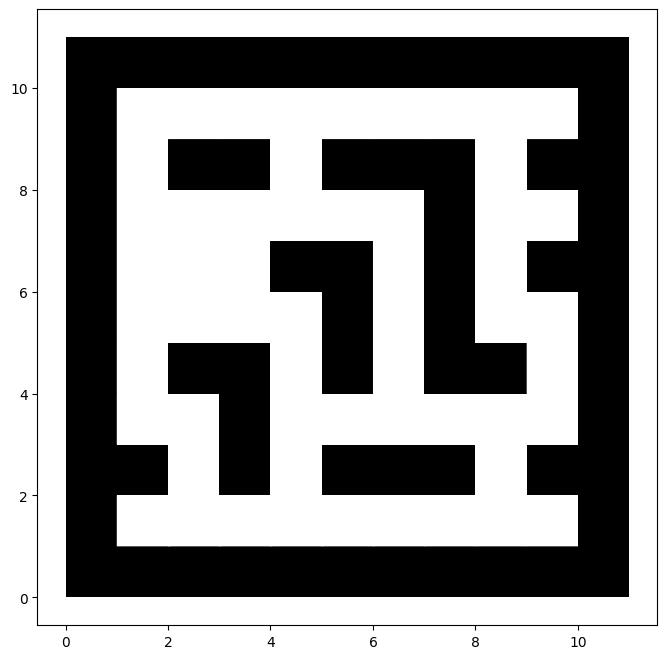

In [5]:
inicio = tuple(map(int, input("Digite as coordenadas de início (ex: 1 1): ").split()))
objetivo = tuple(map(int, input("Digite as coordenadas do objetivo (ex: 9 9): ").split()))

labirinto = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
    [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], 
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], 
    [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1], 
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], 
    [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1], 
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], 
    [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

# Personalização do Mapa (opcional)
labirinto = editar_mapa(labirinto)

# Execução do A*
caminho_a_estrela = busca_a_estrela(labirinto, inicio, objetivo)
if caminho_a_estrela:
    visualizar_labirinto(labirinto, caminho_a_estrela)

# Execução da Busca Bidirecional
caminho_bidirecional = busca_bidirecional(labirinto, inicio, objetivo)
if caminho_bidirecional:
    visualizar_labirinto(labirinto, caminho_bidirecional)

Caminho encontrado (A*): [(1, 1, 0), (1, 2, 0), (1, 3, 0), (1, 4, 0), (1, 5, 0), (1, 6, 0), (1, 7, 0), (1, 8, 0), (2, 8, 0), (3, 8, 0), (3, 9, 0), (4, 9, 0), (5, 9, 0), (5, 8, 0), (6, 8, 0), (7, 8, 0), (7, 8, 1), (7, 7, 1), (6, 7, 1), (5, 7, 1), (5, 6, 1), (4, 6, 1), (3, 6, 1), (3, 5, 1), (2, 5, 1), (1, 5, 1), (1, 4, 1), (1, 3, 1), (1, 2, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2), (1, 3, 2), (1, 4, 2), (2, 4, 2), (3, 4, 2), (3, 5, 2), (3, 6, 2), (3, 7, 2), (3, 8, 2), (3, 9, 2), (4, 9, 2), (5, 9, 2), (6, 9, 2), (7, 9, 2), (8, 9, 2), (9, 9, 2)] com custo total de 46


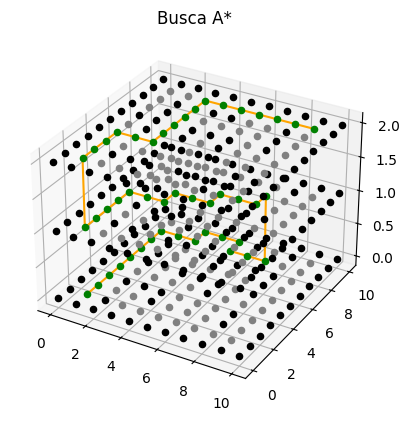

Caminho encontrado (Bidirecional): [(1, 1, 0), (1, 2, 0), (1, 3, 0), (1, 4, 0), (2, 4, 0), (3, 4, 0), (3, 5, 0), (3, 6, 0), (3, 7, 0), (3, 8, 0), (3, 9, 0), (4, 9, 0), (5, 9, 0), (5, 8, 0), (6, 8, 0), (7, 8, 0), (7, 8, 1), (7, 7, 1), (6, 7, 1), (5, 7, 1), (5, 6, 1), (5, 5, 1), (5, 4, 1), (8, 9, 2), (7, 9, 2), (6, 9, 2), (5, 9, 2), (4, 9, 2), (3, 9, 2), (3, 8, 2), (3, 7, 2), (3, 6, 2), (3, 5, 2), (3, 4, 2), (2, 4, 2), (1, 4, 2), (1, 3, 2), (1, 2, 2), (1, 1, 2), (1, 1, 1), (2, 1, 1), (3, 1, 1), (4, 1, 1), (4, 2, 1), (4, 3, 1), (5, 3, 1), (5, 4, 1)] com custo total de 46


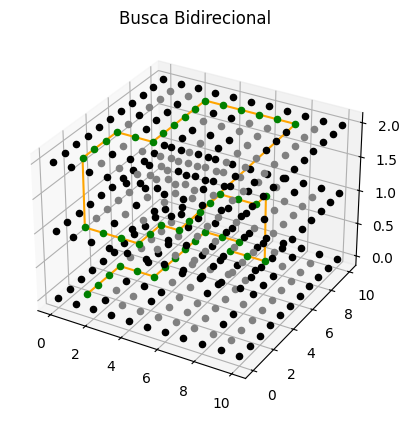

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Função para calcular a distância de Manhattan (heurística)
def distancia_manhattan(no1, no2):
    return abs(no1[0] - no2[0]) + abs(no1[1] - no2[1]) + abs(no1[2] - no2[2])

# Configurações do mapa 3D
mapa = nx.Graph()

andar_1 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
    [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], 
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], 
    [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1], 
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], 
    [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1], 
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], 
    [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

andar_2 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], 
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], 
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], 
    [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1], 
    [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1], 
    [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], 
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], 
    [1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], 
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

andar_3 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], 
    [1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1], 
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], 
    [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1], 
    [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], 
    [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1], 
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], 
    [1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1], 
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

mapas = [andar_1, andar_2, andar_3]

# Função para criar os nós e arestas dos três andares
def criar_mapa():
    # Adiciona nós para cada andar (x, y, z)
    for z, andar in enumerate(mapas):
        for x in range(len(andar)):
            for y in range(len(andar[0])):
                if andar[x][y] == 0:  # Espaços abertos
                    mapa.add_node((x, y, z))
                    
    # Adiciona arestas entre os nós do mesmo andar (adjacentes)
    for z, andar in enumerate(mapas):
        for x in range(len(andar)):
            for y in range(len(andar[0])):
                if andar[x][y] == 0:
                    if x < len(andar) - 1 and andar[x+1][y] == 0:
                        mapa.add_edge((x, y, z), (x+1, y, z), weight=distancia_manhattan((x, y, z), (x+1, y, z)))  # Horizontal
                    if y < len(andar[0]) - 1 and andar[x][y+1] == 0:
                        mapa.add_edge((x, y, z), (x, y+1, z), weight=distancia_manhattan((x, y, z), (x, y+1, z)))  # Vertical

    # Adiciona conexões entre os andares em pontos livres (0) onde há passagens
    # Conexão entre andar 1 e 2 no ponto livre (7, 7, 0) e (7, 7, 1)
    mapa.add_edge((7, 8, 0), (7, 8, 1), weight=distancia_manhattan((7, 8, 0), (7, 8, 1)))

    # Conexão entre andar 2 e 3 no ponto livre (1, 1, 1) e (1, 1, 2)
    mapa.add_edge((1, 1, 1), (1, 1, 2), weight=distancia_manhattan((1, 1, 1), (1, 1, 2)))

# Função para a busca A* (A-star)
def busca_a_estrela(inicio, objetivo):
    fila_prioridade = []
    heapq.heappush(fila_prioridade, (0, inicio))  # Inicializa a fila de prioridade com o nó inicial
    custos = {inicio: 0}  # Dicionário para armazenar os custos dos nós
    antecessores = {inicio: None}  # Dicionário para armazenar os antecessores
    
    while fila_prioridade:
        _, no_atual = heapq.heappop(fila_prioridade)  # Extrai o nó com a menor estimativa de custo
        
        if no_atual == objetivo:
            break  # Encontrou o objetivo
        
        for vizinho in mapa.neighbors(no_atual):
            custo = custos[no_atual] + mapa[no_atual][vizinho]['weight']  # Custo atual + peso da aresta
            
            if vizinho not in custos or custo < custos[vizinho]:
                custos[vizinho] = custo
                antecessores[vizinho] = no_atual
                prioridade = custo + distancia_manhattan(vizinho, objetivo)  # Custo acumulado + heurística (Manhattan)
                heapq.heappush(fila_prioridade, (prioridade, vizinho))  # Insere o nó vizinho na fila de prioridade
    
    # Reconstruir o caminho
    caminho = []
    no = objetivo
    while no is not None:
        caminho.append(no)
        no = antecessores.get(no)  # Usa .get para evitar KeyError
        if no is None and caminho[-1] != inicio:
            print("Nenhum caminho encontrado.")
            return [], float('inf')
        
    return caminho[::-1], custos.get(objetivo, float('inf'))  # Caminho invertido e custo total

# Função para a busca Bidirecional (simplificada)
def busca_bidirecional(inicio, objetivo):
    fronteira_inicio = {inicio: 0}  # Custos a partir do ponto de início
    fronteira_objetivo = {objetivo: 0}  # Custos a partir do ponto de objetivo
    antecessores_inicio = {inicio: None}
    antecessores_objetivo = {objetivo: None}
    visitados_inicio = set()
    visitados_objetivo = set()
    custo_total = float('inf')
    ponto_encontro = None

    while fronteira_inicio and fronteira_objetivo:
        # Expansão da fronteira do início
        if fronteira_inicio:
            no_atual_inicio = min(fronteira_inicio, key=fronteira_inicio.get)
            custo_inicio = fronteira_inicio.pop(no_atual_inicio)
            visitados_inicio.add(no_atual_inicio)
            for vizinho in mapa.neighbors(no_atual_inicio):
                novo_custo = custo_inicio + mapa[no_atual_inicio][vizinho]['weight']
                if vizinho not in visitados_inicio and (vizinho not in fronteira_inicio or novo_custo < fronteira_inicio.get(vizinho, float('inf'))):
                    fronteira_inicio[vizinho] = novo_custo
                    antecessores_inicio[vizinho] = no_atual_inicio

        # Expansão da fronteira do objetivo
        if fronteira_objetivo:
            no_atual_objetivo = min(fronteira_objetivo, key=fronteira_objetivo.get)
            custo_objetivo = fronteira_objetivo.pop(no_atual_objetivo)
            visitados_objetivo.add(no_atual_objetivo)
            for vizinho in mapa.neighbors(no_atual_objetivo):
                novo_custo = custo_objetivo + mapa[no_atual_objetivo][vizinho]['weight']
                if vizinho not in visitados_objetivo and (vizinho not in fronteira_objetivo or novo_custo < fronteira_objetivo.get(vizinho, float('inf'))):
                    fronteira_objetivo[vizinho] = novo_custo
                    antecessores_objetivo[vizinho] = no_atual_objetivo

        # Checagem de encontro e cálculo do custo total
        for no in fronteira_inicio:
            if no in fronteira_objetivo:
                custo_encontro = fronteira_inicio[no] + fronteira_objetivo[no]
                if custo_encontro < custo_total:
                    custo_total = custo_encontro
                    ponto_encontro = no
                    break

        if ponto_encontro:
            break

    # Reconstrução do caminho se o ponto de encontro foi encontrado
    if ponto_encontro:
        caminho_inicio = reconstruir_caminho(antecessores_inicio, ponto_encontro)
        caminho_objetivo = reconstruir_caminho(antecessores_objetivo, ponto_encontro)
        caminho_completo = caminho_inicio + caminho_objetivo[1:]
        return caminho_completo, custo_total
    else:
        return [], float('inf')

# Função para reconstruir o caminho dos antecessores
def reconstruir_caminho(antecessores, no):
    caminho = []
    while no:
        caminho.append(no)
        no = antecessores[no]
    return caminho[::-1]

# Função para visualização do mapa 3D e do caminho
def visualizar_mapa(caminho, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plotar os nós
    for no in mapa.nodes:
        if no in caminho:
            ax.scatter(no[0], no[1], no[2], c='green', marker='o')  # Caminho verde
        else:
            ax.scatter(no[0], no[1], no[2], c='gray', marker='o')  # Espaços abertos cinzas
    
    # Plotar as paredes
    for z, andar in enumerate(mapas):
        for x in range(len(andar)):
            for y in range(len(andar[0])):
                if andar[x][y] == 1:
                    ax.scatter(x, y, z, c='black', marker='o')  # Paredes pretas
    
    # Plotar o caminho
    for i in range(len(caminho) - 1):
        no_atual = caminho[i]
        prox_no = caminho[i + 1]
        ax.plot([no_atual[0], prox_no[0]], [no_atual[1], prox_no[1]], [no_atual[2], prox_no[2]], c='orange')  # Caminho laranja
    
    plt.title(title)
    plt.show()

# Função principal
if __name__ == "__main__":
    criar_mapa()  # Criar o mapa 3D
    inicio = (1, 1, 0)  # Definir início
    objetivo = (9, 9, 2)  # Definir objetivo

    # Busca A* (A-star)
    caminho_astar, custo_total_astar = busca_a_estrela(inicio, objetivo)
    if caminho_astar:
        print(f"Caminho encontrado (A*): {caminho_astar} com custo total de {custo_total_astar}")
        visualizar_mapa(caminho_astar, "Busca A*")
    else:
        print("Nenhum caminho encontrado (A*).")

    # Busca Bidirecional
    caminho_bi, custo_total_bi = busca_bidirecional(inicio, objetivo)
    if caminho_bi:
        print(f"Caminho encontrado (Bidirecional): {caminho_bi} com custo total de {custo_total_bi}")
        visualizar_mapa(caminho_bi, "Busca Bidirecional")
    else:
        print("Nenhum caminho encontrado (Bidirecional).")
        
# Legenda de Cores:
# - Espaços abertos: Cinza
# - Paredes: Preto
# - Pontos do Caminho: Verde
# - Linha do Caminho: Laranja
